In [ ]:
format ELF64
public _start
public exit

section '.bss' writable
my db 0xA, "S=QLQGaThNTMUkUIfNqqbSWtpNV"
newline db 10, 0

section '.text' executable
_start:
    mov rcx, my
    add rcx, 27
    .iter:
        mov rax, 4
        mov rbx, 1

        mov rdx, 1
        int 0x80

        dec rcx
        cmp rcx, my
        jne .iter

    mov rax, 4
    mov rbx, 1

    mov rcx, newline
    mov rdx, 1
    int 0x80

    call exit

exit:
  mov rax, 1
  xor rbx, rbx
  int 0x80


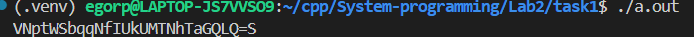

format ELF64
public _start
public exit

section '.bss' writable
sym db '$'
M dq 5
K dq 11
newline db 10

section '.text' executable
_start:
    mov rcx, [K]

    .iter1:
        push rcx
        mov rdx, [M]

        .iter2:
            push rdx

            mov rcx, sym

            mov rax, 4
            mov rbx, 1
            mov rdx, 1
            int 0x80

            pop rdx
            dec rdx
            cmp rdx, 0
            jne .iter2

        mov rax, 4
        mov rbx, 1

        mov rcx, newline
        mov rdx, 1
        int 0x80

        pop rcx
        dec rcx
        cmp rcx, 0
        jne .iter1


    call exit

exit:
  mov rax, 1
  xor rbx, rbx
  int 0x80


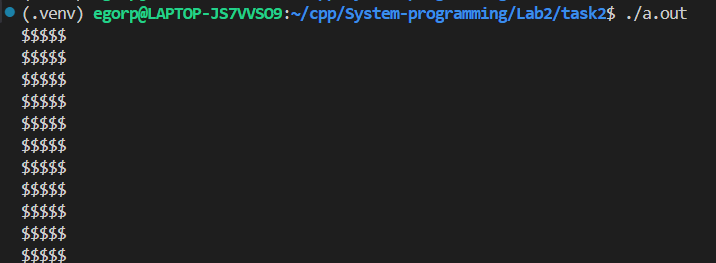

In [ ]:
format ELF64
public _start
public exit

section '.bss' writable
sym db '$'
M dq 5
K dq 11
newline db 10

section '.text' executable
_start:
    mov rcx, 1

    .iter1:
        push rcx
        mov rdx, rcx

        .iter2:
            push rdx

            mov rcx, sym

            mov rax, 4
            mov rbx, 1
            mov rdx, 1
            int 0x80

            pop rdx
            dec rdx
            cmp rdx, 0
            jne .iter2

        mov rax, 4
        mov rbx, 1

        mov rcx, newline
        mov rdx, 1
        int 0x80

        pop rcx
        inc rcx
        cmp rcx, [K]
        jne .iter1


    call exit

exit:
  mov rax, 1
  xor rbx, rbx
  int 0x80


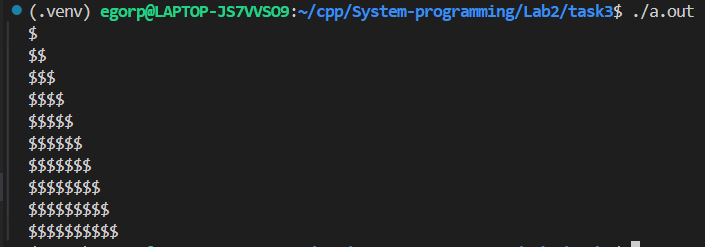

In [ ]:
format ELF64
public _start
public exit

section '.bss' writable
    N dq 2980480801
    res dq 0
    newline db 10
    place db 1

section '.text' executable
_start:
    mov rax, [N]
    mov rbx, 10
    mov rcx, 0

    .iter1:
        xor rdx, rdx
        div rbx
        add rcx, rdx
        test rax, rax
        jnz .iter1

    mov [res], rcx
    call print

    mov rax, 1
    mov rdi, 1
    mov rsi, newline
    mov rdx, 1
    syscall

    call exit

print:
    mov rax, [res]
    xor rbx, rbx

    mov rcx, 10
    .loop:
        xor rdx, rdx
        div rcx
        push rdx
        inc rbx
        test rax, rax
        jnz .loop

    .print_loop:
        pop rax
        add rax, '0'
        mov [place], al

        ; Используем syscall
        push rbx        ; сохраняем счётчик
        mov rax, 1      ; sys_write
        mov rdi, 1      ; stdout
        mov rsi, place  ; буфер
        mov rdx, 1      ; длина
        syscall
        pop rbx         ; восстанавливаем счётчик

        dec rbx
        jnz .print_loop

        ret

exit:
    mov rax, 60         ; sys_exit
    xor rdi, rdi        ; exit code 0
    syscall


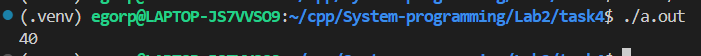

In [ ]:
#include <stdio.h>

long long N = 2980480801;

int main() {
    char sum = 0;
    for (; N; N /= 10){ // for быстрее
        sum += N % 10;
    }

    printf("%d\n", sum);

    return 0;
}


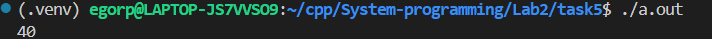